In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

,Energy,g1,g2,g3
0,-1.000,0.578334,0.579368,0.578728
1,-0.998,0.580441,0.581802,0.581196
2,-0.996,0.583296,0.583960,0.583495
3,-0.994,0.586533,0.585900,0.585695
4,-0.992,0.589468,0.587736,0.587906


Minimal height 8.31810277
peaks index: [ 39 112 149 188 255 290 363 414 462 486 556 604 639 726 749 769 795 865
 909 934]
peaks intensity [2.30200604 5.28161442 6.99343775 3.36330574 6.80959785 6.69394002
 1.34905937 5.72217878 4.31043763 3.74447103 6.17409732 3.95970746
 3.11490813 5.84637371 3.86096138 3.29025223 5.24074767 8.31810277
 2.81644403 4.37430774]
peaks Energys [-0.922 -0.776 -0.702 -0.624 -0.49  -0.42  -0.274 -0.172 -0.076 -0.028
  0.112  0.208  0.278  0.452  0.498  0.538  0.59   0.73   0.818  0.868]


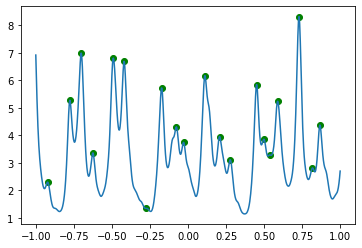

In [18]:
#Prepare the data of a single spectrum
data_file="./spectral_Data/spectras/spectrum35.pl"
df = pd.read_csv(data_file,sep="   ",header =2,engine='python')
df=df.dropna(1)
df.rename(columns={'#': 'Energy',' Energy':'g1','Unnamed: 2':'g2','Unnamed: 3':'g3'}, inplace=True)

df.head()
#finds all peaks which are higher than 10% of the highest peak
df['max']=df.iloc[find_peaks(df.g1.values,height=df.g1.max()*0.051)[0]   ]['g1'].dropna()

print('Minimal height', df.g1.max())
print('peaks index:',find_peaks(df.g1.values,height=df.g1.max()*0.1)[0])
print('peaks intensity',df['max'].dropna().to_numpy())
print('peaks Energys', df['Energy'][df['max'].dropna().index].to_numpy())
test_array_energys=df['Energy'][df['max'].dropna().index].to_numpy()


plt.scatter(df.Energy, df['max'], c='g')
plt.plot(df.Energy, df['g1'])


Minimal height 57.50977679999999
peaks index: [ 84 961]
peaks intensity [15.7807103 57.5097768]
peaks Energys [-0.832  0.922]


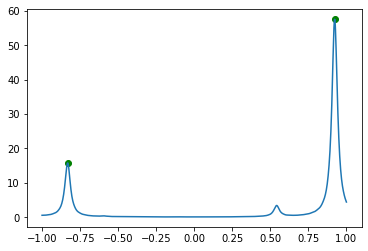

In [16]:
#Prepare the data of a single spectrum
data_file="./spectral_Data/spectras/spectrum10.pl"
df = pd.read_csv(data_file,sep="   ",header =2,engine='python')
df=df.dropna(1)
df.rename(columns={'#': 'Energy',' Energy':'g1','Unnamed: 2':'g2','Unnamed: 3':'g3'}, inplace=True)

df.head()
#finds all peaks which are higher than 10% of the highest peak
df['max']=df.iloc[find_peaks(df.g1.values,height=df.g1.max()*0.2)[0]   ]['g1'].dropna()

print('Minimal height', df.g1.max())
print('peaks index:',find_peaks(df.g1.values,height=df.g1.max()*0.2)[0])
print('peaks intensity',df['max'].dropna().to_numpy())
print('peaks Energys', df['Energy'][df['max'].dropna().index].to_numpy())
test_array_energys=df['Energy'][df['max'].dropna().index].to_numpy()


plt.scatter(df.Energy, df['max'], c='g')
plt.plot(df.Energy, df['g1'])


In [4]:

df_test=pd.DataFrame(zip(df['Energy'][df['max'].dropna().index],df['max'].dropna()), 
                     columns=["Energy","Intensity"])
df_test_array=[df_test,df_test]

In [5]:
result = pd.concat(df_test_array, keys=['file 1', 'file 2'])
result


#figure out how to add more to this

Energy  Intensity
file 1 0  -0.940  14.349293
       1  -0.632  29.750656
       2  -0.348  28.151822
       3   0.044  12.250158
       4   0.800   8.965538
file 2 0  -0.940  14.349293
       1  -0.632  29.750656
       2  -0.348  28.151822
       3   0.044  12.250158
       4   0.800   8.965538

In [6]:
#complete code with list
df_test_list=[]
data_file_list=["spectrum.pl","spectrum.pl","spectrum.pl"]
for data_file in data_file_list:
    df = pd.read_csv(data_file,sep="   ",header =2,engine='python')
    df=df.dropna(1)
    df.rename(columns={'#': 'Energy',' Energy':'g1','Unnamed: 2':'g2','Unnamed: 3':'g3'}, 
              inplace=True)
    df['max']=df.iloc[find_peaks(df.g1.values,height=df.g1.max()*0.1)[0]   ]['g1'].dropna()

    df_test_list.append(pd.DataFrame(zip(df['Energy'][df['max'].dropna().index],
                                         df['max'].dropna()), 
                                         columns=["Energy","Intensity"]))

    
result = pd.concat(df_test_list, keys=["Test1","Test2","Test3"])


In [13]:
import itertools as it
import numpy as np
#a=np.arange(-0.5,0.5,0.1)
a=[-0.5,0,0.5]

final=np.asarray(list((it.product(a,a,a,a,a,a))))
print(len(final))

729


In [52]:
for i in range(5):
    print(final[i])

[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[-0.5 -0.5 -0.5 -0.5 -0.5  0. ]
[-0.5 -0.5 -0.5 -0.5 -0.5  0.5]
[-0.5 -0.5 -0.5 -0.5  0.  -0.5]
[-0.5 -0.5 -0.5 -0.5  0.   0. ]


In [53]:
inputfile = "input/submit.sh"
for i in range(5):
    outname="input/test/submit"+str(i)+".sh"
    with open(outname,'w') as new_file:
        with open(inputfile, 'r') as old_file:
            line = old_file.read()
            new_file.write(line.replace("runxxx", "run"+str(i)).replace("xyz", "-mnd -D {name} -p k6a1 {} -p k6a2 {} -p k11 {} -p k12 {} -p k9a1 {} -p k9a2 {}".format(name="run"+str(i),*final[i])))